In [1]:
%matplotlib inline
import glob
import json
import os
import itertools

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display as d

In [2]:
dr = pd.read_csv("subjective/2022_12_02/_ratings.csv")

dr = dr[dr["rating"] != -1]
dr["is_rating"] = dr["rating_type"].apply(
    lambda x: 
        x in ["range_image_appeal", "range_realism", "range_prompt_matching"]
)
dr = dr[dr["is_rating"]]
d(dr)

dc = dr.groupby(by="user_ID").count().reset_index()

valid_users = set(dc[dc["stimuli_ID"] > 400]["user_ID"].values)
print(f"estimated valid users: {len(valid_users)}")

dr["valid_user"] = dr["user_ID"].apply(
    lambda x:
        x in valid_users
)
dr = dr[dr["valid_user"]]

dr["db"] = dr["stimuli_file"].apply(
    lambda x:
        x.split("/")[2]
)
dr["rating"] = dr["rating"].apply(lambda x: int(x))
dr["image_key"] = dr["stimuli_file"].apply(
    lambda x:
        "/".join(os.path.splitext(x)[0].split("/")[2:])
)
d(dr)
# so we have only valid users now..

,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating
2,1,91,./stimuli/midjourney/p11.png,range_image_appeal,1,2022-09-26 15:42:06 615170,True
3,1,91,./stimuli/midjourney/p11.png,range_realism,1,2022-09-26 15:42:06 615170,True
4,1,91,./stimuli/midjourney/p11.png,range_prompt_matching,1,2022-09-26 15:42:06 615170,True
12,1,64,./stimuli/glide/p11.png,range_image_appeal,1,2022-09-26 15:42:16 529229,True
13,1,64,./stimuli/glide/p11.png,range_realism,1,2022-09-26 15:42:16 529229,True
...,...,...,...,...,...,...,...
30597,117,56,./stimuli/glide/p03.png,range_realism,1,2022-12-01 23:03:53 211456,True
30598,117,56,./stimuli/glide/p03.png,range_prompt_matching,1,2022-12-01 23:03:53 211456,True
30605,117,143,./stimuli/stable_diffusion/p25.png,range_image_appeal,2,2022-12-01 23:04:04 595295,True
30606,117,143,./stimuli/stable_diffusion/p25.png,range_realism,2,2022-12-01 23:04:04 595295,True


estimated valid users: 22


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
2,1,91,./stimuli/midjourney/p11.png,range_image_appeal,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
3,1,91,./stimuli/midjourney/p11.png,range_realism,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
4,1,91,./stimuli/midjourney/p11.png,range_prompt_matching,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
12,1,64,./stimuli/glide/p11.png,range_image_appeal,1,2022-09-26 15:42:16 529229,True,True,glide,glide/p11
13,1,64,./stimuli/glide/p11.png,range_realism,1,2022-09-26 15:42:16 529229,True,True,glide,glide/p11
...,...,...,...,...,...,...,...,...,...,...
30597,117,56,./stimuli/glide/p03.png,range_realism,1,2022-12-01 23:03:53 211456,True,True,glide,glide/p03
30598,117,56,./stimuli/glide/p03.png,range_prompt_matching,1,2022-12-01 23:03:53 211456,True,True,glide,glide/p03
30605,117,143,./stimuli/stable_diffusion/p25.png,range_image_appeal,2,2022-12-01 23:04:04 595295,True,True,stable_diffusion,stable_diffusion/p25
30606,117,143,./stimuli/stable_diffusion/p25.png,range_realism,2,2022-12-01 23:04:04 595295,True,True,stable_diffusion,stable_diffusion/p25


In [3]:
dappeal = dr[dr["rating_type"] == "range_image_appeal"]
d(dappeal)

dprompt = dr[dr["rating_type"] == "range_prompt_matching"]
d(dprompt)

drealism = dr[dr["rating_type"] == "range_realism"]
d(drealism)

,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
2,1,91,./stimuli/midjourney/p11.png,range_image_appeal,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
12,1,64,./stimuli/glide/p11.png,range_image_appeal,1,2022-09-26 15:42:16 529229,True,True,glide,glide/p11
21,1,17,./stimuli/craiyon/p18.png,range_image_appeal,1,2022-09-26 15:42:30 190700,True,True,craiyon,craiyon/p18
30,1,135,./stimuli/stable_diffusion/p17.png,range_image_appeal,2,2022-09-26 15:42:46 618991,True,True,stable_diffusion,stable_diffusion/p17
39,1,47,./stimuli/dall-e/p21.png,range_image_appeal,3,2022-09-26 15:43:11 953410,True,True,dall-e,dall-e/p21
...,...,...,...,...,...,...,...,...,...,...
30569,117,145,./stimuli/stable_diffusion/p27.png,range_image_appeal,3,2022-12-01 23:03:25 166015,True,True,stable_diffusion,stable_diffusion/p27
30578,117,26,./stimuli/craiyon/p27.png,range_image_appeal,1,2022-12-01 23:03:34 624373,True,True,craiyon,craiyon/p27
30587,117,58,./stimuli/glide/p05.png,range_image_appeal,1,2022-12-01 23:03:46 034164,True,True,glide,glide/p05
30596,117,56,./stimuli/glide/p03.png,range_image_appeal,1,2022-12-01 23:03:53 211456,True,True,glide,glide/p03


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
4,1,91,./stimuli/midjourney/p11.png,range_prompt_matching,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
14,1,64,./stimuli/glide/p11.png,range_prompt_matching,1,2022-09-26 15:42:16 529229,True,True,glide,glide/p11
23,1,17,./stimuli/craiyon/p18.png,range_prompt_matching,1,2022-09-26 15:42:30 190700,True,True,craiyon,craiyon/p18
32,1,135,./stimuli/stable_diffusion/p17.png,range_prompt_matching,3,2022-09-26 15:42:46 618991,True,True,stable_diffusion,stable_diffusion/p17
41,1,47,./stimuli/dall-e/p21.png,range_prompt_matching,5,2022-09-26 15:43:11 953410,True,True,dall-e,dall-e/p21
...,...,...,...,...,...,...,...,...,...,...
30571,117,145,./stimuli/stable_diffusion/p27.png,range_prompt_matching,5,2022-12-01 23:03:25 166015,True,True,stable_diffusion,stable_diffusion/p27
30580,117,26,./stimuli/craiyon/p27.png,range_prompt_matching,1,2022-12-01 23:03:34 624373,True,True,craiyon,craiyon/p27
30589,117,58,./stimuli/glide/p05.png,range_prompt_matching,5,2022-12-01 23:03:46 034164,True,True,glide,glide/p05
30598,117,56,./stimuli/glide/p03.png,range_prompt_matching,1,2022-12-01 23:03:53 211456,True,True,glide,glide/p03


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
3,1,91,./stimuli/midjourney/p11.png,range_realism,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
13,1,64,./stimuli/glide/p11.png,range_realism,1,2022-09-26 15:42:16 529229,True,True,glide,glide/p11
22,1,17,./stimuli/craiyon/p18.png,range_realism,1,2022-09-26 15:42:30 190700,True,True,craiyon,craiyon/p18
31,1,135,./stimuli/stable_diffusion/p17.png,range_realism,2,2022-09-26 15:42:46 618991,True,True,stable_diffusion,stable_diffusion/p17
40,1,47,./stimuli/dall-e/p21.png,range_realism,4,2022-09-26 15:43:11 953410,True,True,dall-e,dall-e/p21
...,...,...,...,...,...,...,...,...,...,...
30570,117,145,./stimuli/stable_diffusion/p27.png,range_realism,1,2022-12-01 23:03:25 166015,True,True,stable_diffusion,stable_diffusion/p27
30579,117,26,./stimuli/craiyon/p27.png,range_realism,1,2022-12-01 23:03:34 624373,True,True,craiyon,craiyon/p27
30588,117,58,./stimuli/glide/p05.png,range_realism,2,2022-12-01 23:03:46 034164,True,True,glide,glide/p05
30597,117,56,./stimuli/glide/p03.png,range_realism,1,2022-12-01 23:03:53 211456,True,True,glide,glide/p03


In [4]:
def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")


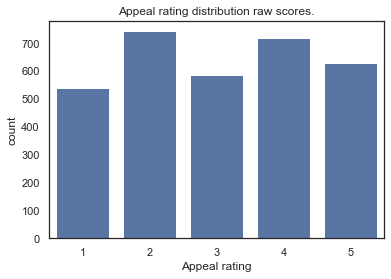

In [5]:
ax = sns.countplot(data=dappeal, x="rating", color="b")
ax.set_xlabel("Appeal rating")
save_fig(ax, "Appeal rating distribution raw scores.", "rating_dist_appeal.pdf")

In [6]:
db_order = sorted(list(set(dr["db"].values)))
print(db_order)

['craiyon', 'dall-e', 'glide', 'midjourney', 'own', 'stable_diffusion']


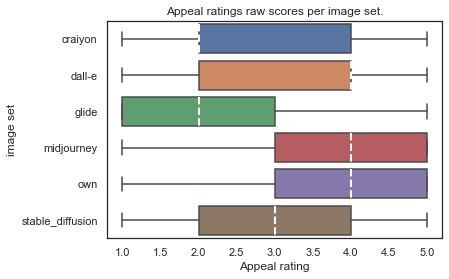

In [7]:
ax = sns.boxplot(data=dappeal, x="rating", y="db", medianprops={"color": "white", "lw":2, "linestyle":"--"},  order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Appeal rating")

save_fig(ax, "Appeal ratings raw scores per image set.", "rating_appeal_per_db.pdf")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

craiyon vs. dall-e: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.358e-24 Stat=1.030e+02
dall-e vs. glide: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.799e-59 Stat=2.625e+02
glide vs. midjourney: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.536e-73 Stat=3.269e+02
midjourney vs. own: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.133e-03 Stat=8.224e+00
own vs. stable_diffusion: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.753e-20 Stat=8.266e+01
craiyon vs. glide: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.689e-12 Stat=4.684e+01
dall-e vs. midjourney: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.104e-06 Stat=2.080e+01
glide vs. own: Krusk

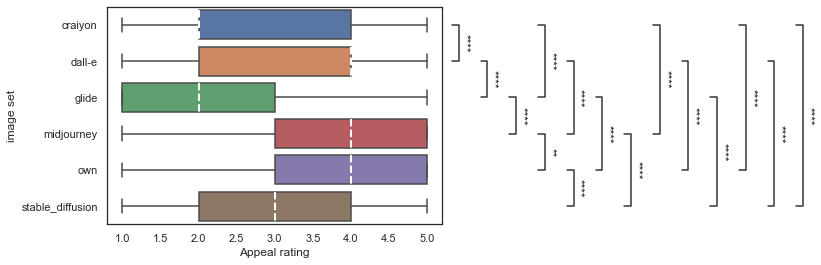

In [8]:

from statannotations.Annotator import Annotator
pairs = list(itertools.combinations(db_order, 2))

ax = sns.boxplot(data=dappeal, x="rating", y="db", medianprops={"color": "white", "lw":2, "linestyle":"--"},  order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Appeal rating")

annot = Annotator(
    ax, 
    pairs, # [("craiyon", "dall-e")], 
    data=dappeal, 
    x="rating", 
    y="db",
    order=db_order,
    orient='h'
)
annot.configure(test='Kruskal', text_format='star', loc='outside', verbose=2)
# other possible tests: 
# ['t-test_ind', 't-test_welch', 't-test_paired',
#                    'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls',
#                     'Levene', 'Wilcoxon', 'Kruskal', 'Brunner-Munzel']
annot.apply_test()
ax, test_results = annot.annotate()




In [9]:
# load objective things, NIMA

def read_json(x):
    with open(x) as xfp:
        j = json.load(xfp)
    r = []
    for c in j:
        c["db"] = os.path.basename(x).split(".")[0]
        r.append(c)
    return r

df = pd.DataFrame(
    sum(
        list(
            map(read_json, glob.glob("nima_appeal/*.json"))
        ), []
    )
)

df["db"] = df["db"].apply(lambda x: x.split("_", 1)[1])
df["image_key"] =  df["db"] + "/" + df["image_id"]
df["nima_appeal"] = df["mean_score_prediction"]
df = df[["image_key", "nima_appeal"]]
d(df)

,image_key,nima_appeal
0,own/p21,5.170084
1,own/p23,5.243021
2,own/p25,5.867942
3,own/p24,5.027028
4,own/p20,5.836780
...,...,...
141,dall-e/p10,4.391277
142,dall-e/p17,4.629117
143,dall-e/p09,5.225628
144,dall-e/p26,4.689971


In [10]:
dappeal_mean = dappeal.groupby(by="image_key").mean().reset_index()
dappeal_mean = dappeal_mean[["image_key", "rating"]]
d(dappeal_mean)

,image_key,rating
0,craiyon/p01,2.636364
1,craiyon/p02,2.818182
2,craiyon/p03,2.636364
3,craiyon/p04,3.000000
4,craiyon/p05,2.227273
...,...,...
141,stable_diffusion/p23,3.272727
142,stable_diffusion/p24,3.681818
143,stable_diffusion/p25,2.714286
144,stable_diffusion/p26,3.318182


In [11]:
dappeal_std = dappeal.groupby(by="image_key").std().reset_index()[["image_key", "rating"]]
dappeal_std = dappeal_std.rename(columns={"rating": "std"})
dappeal_mean = pd.merge(dappeal_mean, dappeal_std, left_on="image_key", right_on="image_key")
d(dappeal_mean)

,image_key,rating,std
0,craiyon/p01,2.636364,1.292670
1,craiyon/p02,2.818182,1.139606
2,craiyon/p03,2.636364,1.216766
3,craiyon/p04,3.000000,1.309307
4,craiyon/p05,2.227273,1.020356
...,...,...,...
141,stable_diffusion/p23,3.272727,1.351606
142,stable_diffusion/p24,3.681818,1.041353
143,stable_diffusion/p25,2.714286,1.346954
144,stable_diffusion/p26,3.318182,1.249242


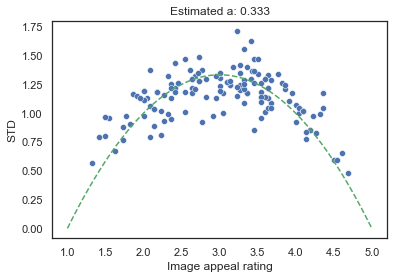

In [12]:
# draw a SOS plot
# read: http://materials.dagstuhl.de/files/15/15022/15022.TobiasHo%C3%9Ffeld1.Preprint.pdf
# for a more detailed description of SOS plots

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")

ax = sns.scatterplot(x="rating", y="std", data=dappeal_mean)

#, with the y=(x-1)*(x-5)* a interpolated function 

x_data = dappeal_mean["rating"].values
y_data = dappeal_mean["std"].replace(np.NaN, 0).values

from scipy.optimize import curve_fit

def fitting_function(x, a):
    return (x - 1) * (x - 5) * (-a)

popt, pcov = curve_fit(fitting_function, x_data, y_data) 


x = np.linspace(1, 5, 100)
ax.plot(x, fitting_function(x, *popt), 'g--')
ax.set_xlabel("Image appeal rating")
ax.set_ylabel("STD")

save_fig(ax, f"Estimated a: {popt[0].round(3)}", "sos_plot_appeal.pdf")

In [13]:
ppp = dappeal_mean.sort_values(by="rating")
d(ppp.head(1))
d(ppp.tail(1))


,image_key,rating,std
75,glide/p22,1.318182,0.5679


,image_key,rating,std
96,midjourney/p16,4.681818,0.476731


In [14]:
dappeal_mean_with_prompt = dappeal_mean.copy()
dappeal_mean_with_prompt["prompt"] = dappeal_mean_with_prompt["image_key"].apply(lambda x: x.split("/")[1])
d(dappeal_mean_with_prompt)

dp22 = dappeal_mean_with_prompt[dappeal_mean_with_prompt["prompt"] == "p22"].sort_values(by="rating")
print(list(dp22["image_key"].values))
print(list(dp22["rating"].round(2).values))

,image_key,rating,std,prompt
0,craiyon/p01,2.636364,1.292670,p01
1,craiyon/p02,2.818182,1.139606,p02
2,craiyon/p03,2.636364,1.216766,p03
3,craiyon/p04,3.000000,1.309307,p04
4,craiyon/p05,2.227273,1.020356,p05
...,...,...,...,...
141,stable_diffusion/p23,3.272727,1.351606,p23
142,stable_diffusion/p24,3.681818,1.041353,p24
143,stable_diffusion/p25,2.714286,1.346954,p25
144,stable_diffusion/p26,3.318182,1.249242,p26


['glide/p22', 'stable_diffusion/p22', 'craiyon/p22', 'own/p22', 'dall-e/p22', 'midjourney/p22']
[1.32, 2.27, 2.41, 3.59, 3.64, 4.5]


In [15]:
dp16 = dappeal_mean_with_prompt[dappeal_mean_with_prompt["prompt"] == "p16"].sort_values(by="rating")
print(list(dp16["image_key"].values))
print(list(dp16["rating"].round(2).values))

['glide/p16', 'craiyon/p16', 'stable_diffusion/p16', 'dall-e/p16', 'midjourney/p16']
[3.09, 3.41, 4.09, 4.23, 4.68]


In [16]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

,image_key,nima_appeal,rating,std,db
0,own/p21,5.170084,4.090909,1.019294,own
1,own/p23,5.243021,3.454545,1.370689,own
2,own/p25,5.867942,4.318182,0.994574,own
3,own/p24,5.027028,4.363636,1.176980,own
4,own/p20,5.836780,4.608696,0.656376,own


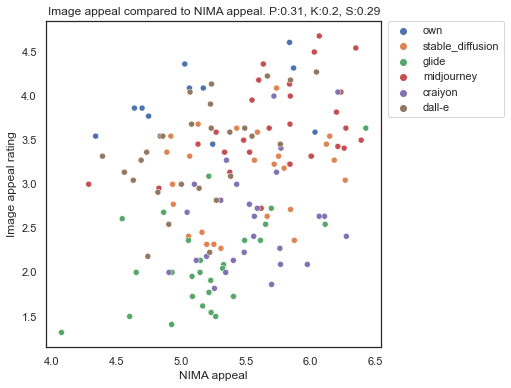

In [17]:
dm = pd.merge(df, dappeal_mean, left_on="image_key", right_on="image_key")
dm["db"] = dm["image_key"].apply(lambda x: x.split("/")[0])
d(dm.head())

ax = sns.scatterplot(x="nima_appeal", y="rating", hue="db", data=dm)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_ylabel("Image appeal rating")
ax.set_xlabel("NIMA appeal")

p =  dm[["nima_appeal", "rating"]].corr().values[0,1]
s = dm[["nima_appeal", "rating"]].corr(method="spearman").values[0,1]
k = dm[["nima_appeal", "rating"]].corr(method="kendall").values[0,1]

save_fig(ax, f"Image appeal compared to NIMA appeal. P:{p.round(2)}, K:{k.round(2)}, S:{s.round(2)}", "appeal_vs_nima.pdf")

In [18]:
vv = []
for g, dg in dm.groupby(by="db"):
    
    p =  dg[["nima_appeal", "rating"]].corr().values[0,1]
    s = dg[["nima_appeal", "rating"]].corr(method="spearman").values[0,1]
    k = dg[["nima_appeal", "rating"]].corr(method="kendall").values[0,1]
    vv.append({
        "db": g,
        "p": p,
        "s":s,
        "k": k
    })
dvv = pd.DataFrame(vv).sort_values(by="p", ascending=False)
d(dvv)
print(dvv.round(2).to_latex(index=False))

,db,p,s,k
2,glide,0.577714,0.394436,0.305942
1,dall-e,0.506356,0.517184,0.352441
3,midjourney,0.470141,0.438846,0.309016
4,own,0.378204,0.246578,0.203739
0,craiyon,0.283299,0.224362,0.164276
5,stable_diffusion,0.220569,0.083435,0.034534


\begin{tabular}{lrrr}
\toprule
              db &    p &    s &    k \\
\midrule
           glide & 0.58 & 0.39 & 0.31 \\
          dall-e & 0.51 & 0.52 & 0.35 \\
      midjourney & 0.47 & 0.44 & 0.31 \\
             own & 0.38 & 0.25 & 0.20 \\
         craiyon & 0.28 & 0.22 & 0.16 \\
stable\_diffusion & 0.22 & 0.08 & 0.03 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1943588/3654382293.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dvv.round(2).to_latex(index=False))


In [19]:
da = df.copy()
da["metric"] = "NIMA_appeal"
da["quality_score"] = da["nima_appeal"]
da = da[["image_key", "metric", "quality_score"]]
d(da)

,image_key,metric,quality_score
0,own/p21,NIMA_appeal,5.170084
1,own/p23,NIMA_appeal,5.243021
2,own/p25,NIMA_appeal,5.867942
3,own/p24,NIMA_appeal,5.027028
4,own/p20,NIMA_appeal,5.836780
...,...,...,...
141,dall-e/p10,NIMA_appeal,4.391277
142,dall-e/p17,NIMA_appeal,4.629117
143,dall-e/p09,NIMA_appeal,5.225628
144,dall-e/p26,NIMA_appeal,4.689971


In [20]:
dq = pd.DataFrame(
    sum(
        list(
            map(read_json, glob.glob("nima_quality/*.json"))
        ), []
    )
)

dq["db"] = dq["db"].apply(lambda x: x.split("_", 1)[1])
dq["image_key"] =  dq["db"] + "/" + dq["image_id"]
dq["quality_score"] = dq["mean_score_prediction"]
dq = dq[["image_key", "quality_score"]]
dq["metric"] = "NIMA_quality"
d(dq)

# read the other iqa models

di = pd.read_csv("iqa_models/iqa.csv")
di["image_key"] = di["model"] + "/" + di["img_id"].apply(lambda x: x.split(".")[0])
di = di[["image_key", "metric", "quality_score"]]
di = pd.concat([di, dq, da], ignore_index=True)

d(di)

,image_key,quality_score,metric
0,glide/p02,5.591642,NIMA_quality
1,glide/p21,5.006300,NIMA_quality
2,glide/p11,5.037328,NIMA_quality
3,glide/p23,5.607345,NIMA_quality
4,glide/p25,4.489417,NIMA_quality
...,...,...,...
141,midjourney/p10,4.791872,NIMA_quality
142,midjourney/p17,4.154626,NIMA_quality
143,midjourney/p09,4.265830,NIMA_quality
144,midjourney/p26,5.097150,NIMA_quality


,image_key,metric,quality_score
0,midjourney/p01,ILNIQE,31.687208
1,midjourney/p02,ILNIQE,21.160603
2,midjourney/p03,ILNIQE,21.166543
3,midjourney/p04,ILNIQE,27.999914
4,midjourney/p05,ILNIQE,22.605025
...,...,...,...
1163,dall-e/p10,NIMA_appeal,4.391277
1164,dall-e/p17,NIMA_appeal,4.629117
1165,dall-e/p09,NIMA_appeal,5.225628
1166,dall-e/p26,NIMA_appeal,4.689971


In [21]:
values = []
for metric, dg in di.groupby(by="metric"):
    #print(metric)
    dm = pd.merge(dg, dappeal_mean, left_on="image_key", right_on="image_key")
    #d(dm)
    
    p =  dm[["quality_score", "rating"]].corr().values[0,1]
    s = dm[["quality_score", "rating"]].corr(method="spearman").values[0,1]
    k = dm[["quality_score", "rating"]].corr(method="kendall").values[0,1]
    #print(p, s, k)
    values.append({
        "metric": metric,
        "p": p,
        "k": k,
        "s": s
    })

    #break
    
dmetrics = pd.DataFrame(values).sort_values(by="p")
d(dmetrics)
print(dmetrics.round(2).to_latex(index=False))

,metric,p,k,s
7,NIQE,-0.427151,-0.267662,-0.395270
0,BRISQUE,-0.377541,-0.229615,-0.330484
2,ILNIQE,-0.346098,-0.190807,-0.277690
6,NIMA_quality,-0.054492,-0.052125,-0.072256
1,DBCNN,0.076477,0.044896,0.070916
4,MUSIQ,0.153249,0.092835,0.147473
5,NIMA_appeal,0.306542,0.195372,0.287361
3,MANIQA,0.338638,0.239507,0.368105


\begin{tabular}{lrrr}
\toprule
      metric &     p &     k &     s \\
\midrule
        NIQE & -0.43 & -0.27 & -0.40 \\
     BRISQUE & -0.38 & -0.23 & -0.33 \\
      ILNIQE & -0.35 & -0.19 & -0.28 \\
NIMA\_quality & -0.05 & -0.05 & -0.07 \\
       DBCNN &  0.08 &  0.04 &  0.07 \\
       MUSIQ &  0.15 &  0.09 &  0.15 \\
 NIMA\_appeal &  0.31 &  0.20 &  0.29 \\
      MANIQA &  0.34 &  0.24 &  0.37 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1943588/1345928792.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dmetrics.round(2).to_latex(index=False))


In [22]:
di_wide = pd.pivot(
    di, 
    index=['image_key'], 
    columns = 'metric',
    values = 'quality_score'
)

#d(di_wide.reset_index())
dfeat = pd.merge(di_wide, dappeal_mean, left_on="image_key", right_on="image_key")

d(dfeat)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

X = dfeat[dfeat.columns.difference(["image_key", "rating"])].values
Y = dfeat["rating"].values

model = RandomForestRegressor(n_jobs=-1, criterion="squared_error", random_state=42)

pred = cross_val_predict(model, X, Y, cv=10)

print(pred)

,image_key,BRISQUE,DBCNN,ILNIQE,MANIQA,MUSIQ,NIMA_appeal,NIMA_quality,NIQE,rating,std
0,craiyon/p01,25.367859,51.057320,33.671886,0.466089,51.691582,5.564671,5.507299,3.972400,2.636364,1.292670
1,craiyon/p02,8.810669,55.195045,23.089588,0.469411,68.810799,5.305506,5.397500,3.208504,2.818182,1.139606
2,craiyon/p03,24.447266,57.967525,22.402807,0.594650,77.050194,6.107202,4.639454,2.685209,2.636364,1.216766
3,craiyon/p04,44.500427,33.711052,42.294760,0.360085,38.880398,5.101118,5.312219,7.274323,3.000000,1.309307
4,craiyon/p05,29.026245,56.431339,23.623487,0.528562,64.424591,5.486148,5.102327,3.514461,2.227273,1.020356
...,...,...,...,...,...,...,...,...,...,...,...
141,stable_diffusion/p23,10.125061,69.777054,20.873362,0.599800,74.770065,5.565258,5.143059,3.135735,3.272727,1.351606
142,stable_diffusion/p24,5.935364,54.691650,28.178576,0.660778,60.904453,5.130220,5.370999,3.960104,3.681818,1.041353
143,stable_diffusion/p25,14.124878,58.166477,20.604286,0.684895,70.483986,5.844317,5.007315,2.666893,2.714286,1.346954
144,stable_diffusion/p26,49.064209,76.710747,21.403188,0.682027,74.843925,5.065353,5.810271,3.733732,3.318182,1.249242


[2.99246753 2.80181818 2.93727273 2.65551383 3.14573593 3.14331169
 2.03176548 2.72827781 2.30065217 3.49363636 2.45559289 3.47727273
 2.32333992 3.12628176 3.54038961 2.94474026 2.70432806 2.20410503
 2.69396104 2.6712253  3.05164973 2.82454545 2.93409091 3.30357143
 3.23231225 2.77045455 2.37628458 2.63173913 3.07046396 3.72584416
 3.01       3.23207792 3.51818182 2.68199605 3.71772727 3.06409091
 3.05136364 3.37318182 3.4137013  2.82864107 3.98290984 3.83409091
 3.95790514 3.54181818 2.9895671  3.28028139 2.83918972 3.23564935
 3.07090909 3.22143234 3.32909091 3.36045455 3.37032468 3.3425974
 2.9404169  2.605      2.44227273 2.14521739 3.31649351 2.57560606
 3.82679842 2.9961039  3.10954545 2.08274704 2.03486166 2.30389328
 2.11494071 3.55150198 2.41873518 3.33045455 2.37029644 2.29405138
 2.39863636 2.85545455 2.29772727 2.37899586 2.78049407 3.28901374
 2.24619518 2.49090909 1.99982684 3.41595709 3.40383117 3.32448052
 3.10415584 3.22266234 3.37012987 3.26900903 3.21246753 2.47292

0.51 0.32 0.45


,image_key,rating,pred
0,craiyon/p01,2.636364,2.992468
1,craiyon/p02,2.818182,2.801818
2,craiyon/p03,2.636364,2.937273
3,craiyon/p04,3.000000,2.655514
4,craiyon/p05,2.227273,3.145736
...,...,...,...
141,stable_diffusion/p23,3.272727,3.105844
142,stable_diffusion/p24,3.681818,3.659113
143,stable_diffusion/p25,2.714286,3.498831
144,stable_diffusion/p26,3.318182,2.820909


<AxesSubplot:xlabel='rating', ylabel='pred'>

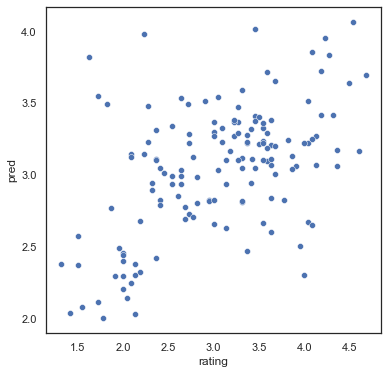

In [23]:
dval = dfeat[["image_key", "rating"]].copy()
dval["pred"] = pred

p =  dval[["pred", "rating"]].corr().values[0,1]
s = dval[["pred", "rating"]].corr(method="spearman").values[0,1]
k = dval[["pred", "rating"]].corr(method="kendall").values[0,1]

print(p.round(2), k.round(2), s.round(2))
d(dval)
sns.scatterplot(data=dval, x="rating", y="pred")

In [24]:
from sklearn.ensemble import RandomForestClassifier

dfeat["db"] = dfeat["image_key"].apply(lambda x: x.split("/")[0])
d(dfeat)

X = dfeat[dfeat.columns.difference(["image_key", "rating", "db"])].values
Y = dfeat["db"].values

model = RandomForestClassifier(n_jobs=-1, random_state=42)

pred = cross_val_predict(model, X, Y, cv=10)
print(pred)

,image_key,BRISQUE,DBCNN,ILNIQE,MANIQA,MUSIQ,NIMA_appeal,NIMA_quality,NIQE,rating,std,db
0,craiyon/p01,25.367859,51.057320,33.671886,0.466089,51.691582,5.564671,5.507299,3.972400,2.636364,1.292670,craiyon
1,craiyon/p02,8.810669,55.195045,23.089588,0.469411,68.810799,5.305506,5.397500,3.208504,2.818182,1.139606,craiyon
2,craiyon/p03,24.447266,57.967525,22.402807,0.594650,77.050194,6.107202,4.639454,2.685209,2.636364,1.216766,craiyon
3,craiyon/p04,44.500427,33.711052,42.294760,0.360085,38.880398,5.101118,5.312219,7.274323,3.000000,1.309307,craiyon
4,craiyon/p05,29.026245,56.431339,23.623487,0.528562,64.424591,5.486148,5.102327,3.514461,2.227273,1.020356,craiyon
...,...,...,...,...,...,...,...,...,...,...,...,...
141,stable_diffusion/p23,10.125061,69.777054,20.873362,0.599800,74.770065,5.565258,5.143059,3.135735,3.272727,1.351606,stable_diffusion
142,stable_diffusion/p24,5.935364,54.691650,28.178576,0.660778,60.904453,5.130220,5.370999,3.960104,3.681818,1.041353,stable_diffusion
143,stable_diffusion/p25,14.124878,58.166477,20.604286,0.684895,70.483986,5.844317,5.007315,2.666893,2.714286,1.346954,stable_diffusion
144,stable_diffusion/p26,49.064209,76.710747,21.403188,0.682027,74.843925,5.065353,5.810271,3.733732,3.318182,1.249242,stable_diffusion


['craiyon' 'craiyon' 'midjourney' 'glide' 'craiyon' 'craiyon' 'glide'
 'glide' 'glide' 'midjourney' 'glide' 'midjourney' 'glide' 'midjourney'
 'midjourney' 'craiyon' 'glide' 'glide' 'craiyon' 'craiyon' 'glide'
 'dall-e' 'craiyon' 'midjourney' 'craiyon' 'craiyon' 'craiyon' 'glide'
 'dall-e' 'dall-e' 'dall-e' 'dall-e' 'stable_diffusion' 'dall-e' 'craiyon'
 'dall-e' 'dall-e' 'stable_diffusion' 'midjourney' 'dall-e' 'dall-e'
 'dall-e' 'dall-e' 'dall-e' 'glide' 'dall-e' 'dall-e' 'craiyon' 'dall-e'
 'glide' 'dall-e' 'dall-e' 'stable_diffusion' 'dall-e' 'glide' 'craiyon'
 'glide' 'glide' 'glide' 'dall-e' 'dall-e' 'craiyon' 'glide' 'glide'
 'glide' 'glide' 'craiyon' 'glide' 'craiyon' 'dall-e' 'craiyon' 'glide'
 'glide' 'glide' 'glide' 'glide' 'glide' 'midjourney' 'glide' 'dall-e'
 'glide' 'midjourney' 'midjourney' 'midjourney' 'midjourney' 'midjourney'
 'own' 'midjourney' 'craiyon' 'craiyon' 'midjourney' 'craiyon'
 'midjourney' 'dall-e' 'midjourney' 'own' 'stable_diffusion' 'craiyon'
 'midjour

In [25]:
dval_c = dfeat[["image_key", "db"]].copy()
dval_c["pred"] = pred
d(dval_c)

,image_key,db,pred
0,craiyon/p01,craiyon,craiyon
1,craiyon/p02,craiyon,craiyon
2,craiyon/p03,craiyon,midjourney
3,craiyon/p04,craiyon,glide
4,craiyon/p05,craiyon,craiyon
...,...,...,...
141,stable_diffusion/p23,stable_diffusion,midjourney
142,stable_diffusion/p24,stable_diffusion,stable_diffusion
143,stable_diffusion/p25,stable_diffusion,stable_diffusion
144,stable_diffusion/p26,stable_diffusion,stable_diffusion


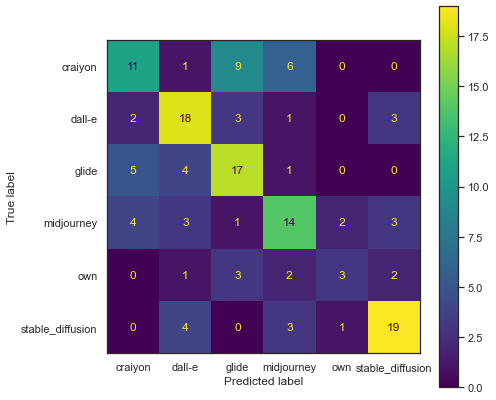

In [26]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("white")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

classes = sorted(list(set(dval_c["db"].values)))
cm = confusion_matrix(dval_c["db"], dval_c["pred"], labels=classes)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=classes,
    
)
disp.plot()

In [27]:
disp.figure_.savefig("dataset_class.pdf", bbox_inches="tight")





In [28]:
dl = pd.read_json("ai_features.json")
dl["image_key"] = dl["image"].apply(lambda x: x.replace("/home/sgoering/ai_generated_photos_appeal/avrateVoyager/app/stimuli/", "").replace(".png", ""))
feature_cols = ["color_fulness", "tone", "saturation", "si", "contrast", "cpbd", "blur_stength"]
dl = dl[["image_key"] + feature_cols]
d(dl.head())
d(dappeal_mean)
dmf = pd.merge(dl, dappeal_mean, left_on="image_key", right_on="image_key")
d(dmf)
values = []
for f in feature_cols:
    p = dmf[[f, "rating"]].corr().values[0,1]
    s = dmf[[f, "rating"]].corr(method="spearman").values[0,1]
    k = dmf[[f, "rating"]].corr(method="kendall").values[0,1]
    values.append({
        "feature": f,
        "p": p,
        "k": k,
        "s": s
    })

dmmm = pd.DataFrame(values).sort_values(by="p")
d(dmmm)

print(dmmm.round(2).to_latex(index=False))

,image_key,color_fulness,tone,saturation,si,contrast,cpbd,blur_stength
0,craiyon/p01,144.010318,0.939657,60.437065,0.366421,93.341072,0.824386,0.409098
1,craiyon/p02,160.864403,0.682485,47.273052,0.297686,86.861719,0.568396,0.374859
2,craiyon/p03,165.274028,0.834870,47.667258,0.354535,95.627120,0.815029,0.299767
3,craiyon/p04,139.607826,0.762945,71.409860,0.118574,91.062077,0.552941,0.604691
4,craiyon/p05,69.004949,0.712958,26.548054,0.375545,87.806314,0.815621,0.411801


,image_key,rating,std
0,craiyon/p01,2.636364,1.292670
1,craiyon/p02,2.818182,1.139606
2,craiyon/p03,2.636364,1.216766
3,craiyon/p04,3.000000,1.309307
4,craiyon/p05,2.227273,1.020356
...,...,...,...
141,stable_diffusion/p23,3.272727,1.351606
142,stable_diffusion/p24,3.681818,1.041353
143,stable_diffusion/p25,2.714286,1.346954
144,stable_diffusion/p26,3.318182,1.249242


,image_key,color_fulness,tone,saturation,si,contrast,cpbd,blur_stength,rating,std
0,craiyon/p01,144.010318,0.939657,60.437065,0.366421,93.341072,0.824386,0.409098,2.636364,1.292670
1,craiyon/p02,160.864403,0.682485,47.273052,0.297686,86.861719,0.568396,0.374859,2.818182,1.139606
2,craiyon/p03,165.274028,0.834870,47.667258,0.354535,95.627120,0.815029,0.299767,2.636364,1.216766
3,craiyon/p04,139.607826,0.762945,71.409860,0.118574,91.062077,0.552941,0.604691,3.000000,1.309307
4,craiyon/p05,69.004949,0.712958,26.548054,0.375545,87.806314,0.815621,0.411801,2.227273,1.020356
...,...,...,...,...,...,...,...,...,...,...
141,stable_diffusion/p23,139.300242,0.560965,33.997242,0.232472,92.866035,0.962264,0.367075,3.272727,1.351606
142,stable_diffusion/p24,83.123848,0.857133,5.276774,0.595288,89.188444,0.939130,0.220531,3.681818,1.041353
143,stable_diffusion/p25,132.481062,0.665555,29.002990,0.355601,87.527195,0.967742,0.278682,2.714286,1.346954
144,stable_diffusion/p26,165.896037,0.792398,55.888866,0.519960,85.056767,0.989130,0.263289,3.318182,1.249242


,feature,p,k,s
6,blur_stength,-0.387452,-0.256628,-0.378195
2,saturation,-0.033292,-0.018072,-0.028960
0,color_fulness,0.016005,-0.044325,-0.064292
3,si,0.041919,0.004185,0.007645
1,tone,0.079949,-0.002568,-0.002616
5,cpbd,0.142524,0.122354,0.179473
4,contrast,0.254623,0.152569,0.224040


\begin{tabular}{lrrr}
\toprule
      feature &     p &     k &     s \\
\midrule
 blur\_stength & -0.39 & -0.26 & -0.38 \\
   saturation & -0.03 & -0.02 & -0.03 \\
color\_fulness &  0.02 & -0.04 & -0.06 \\
           si &  0.04 &  0.00 &  0.01 \\
         tone &  0.08 & -0.00 & -0.00 \\
         cpbd &  0.14 &  0.12 &  0.18 \\
     contrast &  0.25 &  0.15 &  0.22 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1943588/2708355064.py:24: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dmmm.round(2).to_latex(index=False))


In [29]:
X = dmf[feature_cols].values
Y = dmf["rating"].values

model = RandomForestRegressor(n_jobs=-1, criterion="squared_error", random_state=42)

pred = cross_val_predict(model, X, Y, cv=10)

print(pred)

[2.67454545 2.9784632  3.44396104 2.85832486 2.4604329  2.38363636
 2.633083   2.42891775 2.76583004 3.06571429 3.14961039 3.35474026
 2.66130905 3.54538961 3.40584416 3.08688312 3.24272727 2.51527668
 3.43285714 2.78870036 3.75038961 2.71108696 2.59901374 3.6725974
 2.71310277 2.41857143 2.77780632 3.31166008 3.10233202 3.58811688
 2.46756352 3.46428571 3.08233766 2.53898268 2.18272163 2.69798701
 2.18309524 3.7174026  3.2812987  2.29168925 3.7461039  3.56181818
 4.10863636 3.19993506 2.37466874 3.4297619  2.84353755 3.22454545
 2.76472332 3.42318182 3.17422078 3.16103896 3.62181818 2.64990119
 2.53755411 2.75636364 2.62294749 2.56535479 2.43454545 2.86528609
 2.47792208 2.2893083  2.57294466 3.11409091 2.87667984 2.97604743
 3.06442688 3.32746753 2.54541502 3.22344156 2.78219368 2.6012253
 2.69017787 3.48865613 3.17064935 3.21046866 3.30246941 2.27755411
 2.52137305 2.67363636 2.73909561 3.22675325 3.57980519 3.22467532
 3.60701299 3.2711039  3.7461039  3.43194805 2.95322981 2.720988

0.28 0.17 0.27


,image_key,rating,pred
0,craiyon/p01,2.636364,2.674545
1,craiyon/p02,2.818182,2.978463
2,craiyon/p03,2.636364,3.443961
3,craiyon/p04,3.000000,2.858325
4,craiyon/p05,2.227273,2.460433
...,...,...,...
141,stable_diffusion/p23,3.272727,3.636429
142,stable_diffusion/p24,3.681818,3.213636
143,stable_diffusion/p25,2.714286,3.339545
144,stable_diffusion/p26,3.318182,3.030455


<AxesSubplot:xlabel='rating', ylabel='pred'>

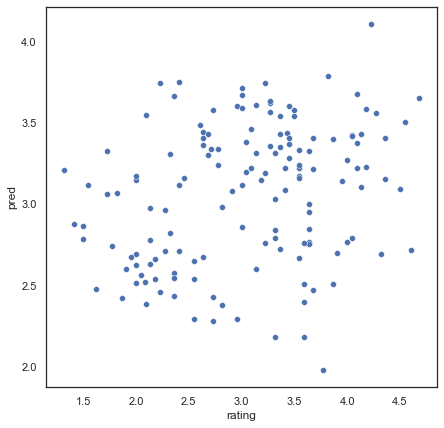

In [30]:
dval = dmf[["image_key", "rating"]].copy()
dval["pred"] = pred

p =  dval[["pred", "rating"]].corr().values[0,1]
s = dval[["pred", "rating"]].corr(method="spearman").values[0,1]
k = dval[["pred", "rating"]].corr(method="kendall").values[0,1]

print(p.round(2), k.round(2), s.round(2))
d(dval)
sns.scatterplot(data=dval, x="rating", y="pred")

In [31]:
dall = pd.merge(
    dfeat[dfeat.columns.difference(["db", "rating"])],
    dmf,
    left_on="image_key",
    right_on="image_key"
)
d(dall)

,BRISQUE,DBCNN,ILNIQE,MANIQA,MUSIQ,NIMA_appeal,NIMA_quality,NIQE,image_key,std_x,color_fulness,tone,saturation,si,contrast,cpbd,blur_stength,rating,std_y
0,25.367859,51.057320,33.671886,0.466089,51.691582,5.564671,5.507299,3.972400,craiyon/p01,1.292670,144.010318,0.939657,60.437065,0.366421,93.341072,0.824386,0.409098,2.636364,1.292670
1,8.810669,55.195045,23.089588,0.469411,68.810799,5.305506,5.397500,3.208504,craiyon/p02,1.139606,160.864403,0.682485,47.273052,0.297686,86.861719,0.568396,0.374859,2.818182,1.139606
2,24.447266,57.967525,22.402807,0.594650,77.050194,6.107202,4.639454,2.685209,craiyon/p03,1.216766,165.274028,0.834870,47.667258,0.354535,95.627120,0.815029,0.299767,2.636364,1.216766
3,44.500427,33.711052,42.294760,0.360085,38.880398,5.101118,5.312219,7.274323,craiyon/p04,1.309307,139.607826,0.762945,71.409860,0.118574,91.062077,0.552941,0.604691,3.000000,1.309307
4,29.026245,56.431339,23.623487,0.528562,64.424591,5.486148,5.102327,3.514461,craiyon/p05,1.020356,69.004949,0.712958,26.548054,0.375545,87.806314,0.815621,0.411801,2.227273,1.020356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,10.125061,69.777054,20.873362,0.599800,74.770065,5.565258,5.143059,3.135735,stable_diffusion/p23,1.351606,139.300242,0.560965,33.997242,0.232472,92.866035,0.962264,0.367075,3.272727,1.351606
142,5.935364,54.691650,28.178576,0.660778,60.904453,5.130220,5.370999,3.960104,stable_diffusion/p24,1.041353,83.123848,0.857133,5.276774,0.595288,89.188444,0.939130,0.220531,3.681818,1.041353
143,14.124878,58.166477,20.604286,0.684895,70.483986,5.844317,5.007315,2.666893,stable_diffusion/p25,1.346954,132.481062,0.665555,29.002990,0.355601,87.527195,0.967742,0.278682,2.714286,1.346954
144,49.064209,76.710747,21.403188,0.682027,74.843925,5.065353,5.810271,3.733732,stable_diffusion/p26,1.249242,165.896037,0.792398,55.888866,0.519960,85.056767,0.989130,0.263289,3.318182,1.249242


In [32]:
X = dall[dall.columns.difference(["rating", "image_key"])].values
Y = dall["rating"].values

model = RandomForestRegressor(n_jobs=-1, criterion="squared_error", random_state=42)

pred = cross_val_predict(model, X, Y, cv=10)

print(pred)

[3.00364107 2.82437229 3.00045455 2.72164032 3.07560606 2.97123847
 2.11185959 2.76483625 2.31533597 3.80287879 2.60472803 3.47564935
 2.42634387 3.1815895  3.50272727 2.80801242 2.633083   2.17273198
 2.99883117 2.91209486 3.38156315 2.74749859 2.97109166 3.44538961
 3.18762846 2.75818182 2.50300866 2.68458498 3.07249388 3.86090909
 2.79092885 3.41253247 3.56636834 2.605      3.55045455 3.06673631
 2.90545455 3.33683983 3.31538961 2.79409561 3.95500941 3.99136364
 3.99568041 3.4987013  2.85295784 3.3        2.82407585 3.34538961
 3.07363636 3.35535573 3.20402597 3.21086957 3.54       3.32363636
 2.83901656 2.74509599 2.52045455 2.20256917 3.20387916 2.5965208
 3.60901186 2.90924619 2.98268775 2.10972332 2.06816206 2.41719368
 2.2441502  3.56679842 2.28067194 3.26675325 2.28752964 2.34492095
 2.44772727 2.94869565 2.40873518 2.47401092 2.87463862 3.15493506
 2.11990119 2.72136364 2.08500471 3.53982684 3.40058442 3.32987013
 3.21363636 3.20805195 3.28701299 3.47209957 3.20558442 2.55201

0.53 0.34 0.47


,image_key,rating,pred
0,craiyon/p01,2.636364,3.003641
1,craiyon/p02,2.818182,2.824372
2,craiyon/p03,2.636364,3.000455
3,craiyon/p04,3.000000,2.721640
4,craiyon/p05,2.227273,3.075606
...,...,...,...
141,stable_diffusion/p23,3.272727,3.293247
142,stable_diffusion/p24,3.681818,3.396364
143,stable_diffusion/p25,2.714286,3.327662
144,stable_diffusion/p26,3.318182,2.801364


<AxesSubplot:xlabel='rating', ylabel='pred'>

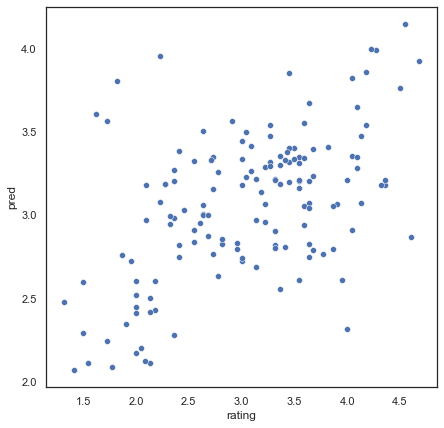

In [33]:
dval = dall[["image_key", "rating"]].copy()
dval["pred"] = pred

p =  dval[["pred", "rating"]].corr().values[0,1]
s = dval[["pred", "rating"]].corr(method="spearman").values[0,1]
k = dval[["pred", "rating"]].corr(method="kendall").values[0,1]

print(p.round(2), k.round(2), s.round(2))
d(dval)
sns.scatterplot(data=dval, x="rating", y="pred")

In [34]:

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")

# checkout realism

In [35]:

d(drealism)
drealism_mean = drealism.groupby(by="image_key").mean().reset_index()
drealism_mean = drealism_mean[["image_key", "rating"]]
d(drealism_mean)

,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
3,1,91,./stimuli/midjourney/p11.png,range_realism,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
13,1,64,./stimuli/glide/p11.png,range_realism,1,2022-09-26 15:42:16 529229,True,True,glide,glide/p11
22,1,17,./stimuli/craiyon/p18.png,range_realism,1,2022-09-26 15:42:30 190700,True,True,craiyon,craiyon/p18
31,1,135,./stimuli/stable_diffusion/p17.png,range_realism,2,2022-09-26 15:42:46 618991,True,True,stable_diffusion,stable_diffusion/p17
40,1,47,./stimuli/dall-e/p21.png,range_realism,4,2022-09-26 15:43:11 953410,True,True,dall-e,dall-e/p21
...,...,...,...,...,...,...,...,...,...,...
30570,117,145,./stimuli/stable_diffusion/p27.png,range_realism,1,2022-12-01 23:03:25 166015,True,True,stable_diffusion,stable_diffusion/p27
30579,117,26,./stimuli/craiyon/p27.png,range_realism,1,2022-12-01 23:03:34 624373,True,True,craiyon,craiyon/p27
30588,117,58,./stimuli/glide/p05.png,range_realism,2,2022-12-01 23:03:46 034164,True,True,glide,glide/p05
30597,117,56,./stimuli/glide/p03.png,range_realism,1,2022-12-01 23:03:53 211456,True,True,glide,glide/p03


,image_key,rating
0,craiyon/p01,2.045455
1,craiyon/p02,2.772727
2,craiyon/p03,1.909091
3,craiyon/p04,3.181818
4,craiyon/p05,1.863636
...,...,...
141,stable_diffusion/p23,3.727273
142,stable_diffusion/p24,3.772727
143,stable_diffusion/p25,3.095238
144,stable_diffusion/p26,2.772727


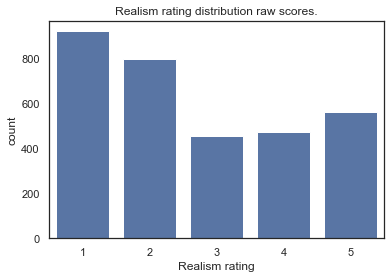

In [36]:
ax = sns.countplot(data=drealism, x="rating",  color="b")
ax.set_xlabel("Realism rating")
save_fig(ax, "Realism rating distribution raw scores.", "rating_dist_realism.pdf")

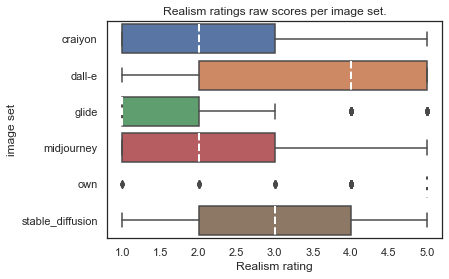

In [37]:
ax = sns.boxplot(data=drealism, x="rating", y="db", medianprops={"color": "white", "lw":2, "linestyle":"--"}, order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Realism rating")

save_fig(ax, "Realism ratings raw scores per image set.", "rating_realism_per_db.pdf")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

craiyon vs. dall-e: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.358e-24 Stat=1.030e+02
dall-e vs. glide: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.799e-59 Stat=2.625e+02
glide vs. midjourney: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.536e-73 Stat=3.269e+02
midjourney vs. own: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.133e-03 Stat=8.224e+00
own vs. stable_diffusion: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.753e-20 Stat=8.266e+01
craiyon vs. glide: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.689e-12 Stat=4.684e+01
dall-e vs. midjourney: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.104e-06 Stat=2.080e+01
glide vs. own: Krusk

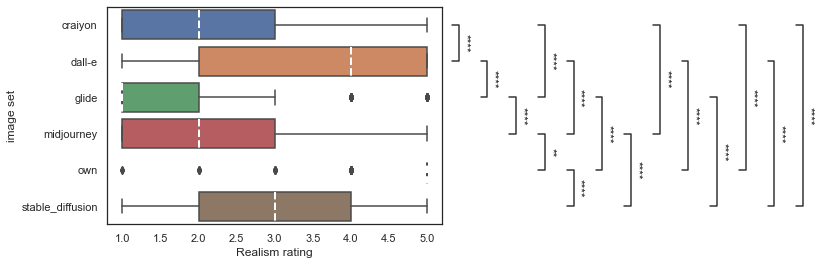

In [38]:
from statannotations.Annotator import Annotator
pairs = list(itertools.combinations(db_order, 2))

ax = sns.boxplot(data=drealism, x="rating", y="db", medianprops={"color": "white", "lw":2, "linestyle":"--"},  order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Realism rating")


annot = Annotator(
    ax, 
    pairs, # [("craiyon", "dall-e")], 
    data=dappeal, 
    x="rating", 
    y="db",
    order=db_order,
    orient='h'
)
annot.configure(test='Kruskal', text_format='star', loc='outside', verbose=2)
# other possible tests: 
# ['t-test_ind', 't-test_welch', 't-test_paired',
#                    'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls',
#                     'Levene', 'Wilcoxon', 'Kruskal', 'Brunner-Munzel']
annot.apply_test()
ax, test_results = annot.annotate()


In [39]:
ppp = drealism_mean.sort_values(by="rating")
d(ppp.head(1))
d(ppp.tail(1))

drealism_mean_with_prompt = drealism_mean.copy()
drealism_mean_with_prompt["prompt"] = drealism_mean_with_prompt["image_key"].apply(lambda x: x.split("/")[1])
d(drealism_mean_with_prompt)

,image_key,rating
70,glide/p17,1.136364


,image_key,rating
112,own/p21,4.863636


,image_key,rating,prompt
0,craiyon/p01,2.045455,p01
1,craiyon/p02,2.772727,p02
2,craiyon/p03,1.909091,p03
3,craiyon/p04,3.181818,p04
4,craiyon/p05,1.863636,p05
...,...,...,...
141,stable_diffusion/p23,3.727273,p23
142,stable_diffusion/p24,3.772727,p24
143,stable_diffusion/p25,3.095238,p25
144,stable_diffusion/p26,2.772727,p26


In [40]:
dp17 = drealism_mean_with_prompt[drealism_mean_with_prompt["prompt"] == "p17"].sort_values(by="rating")
print(list(dp17["image_key"].values))
print(list(dp17["rating"].round(2).values))

['glide/p17', 'stable_diffusion/p17', 'craiyon/p17', 'midjourney/p17', 'dall-e/p17', 'own/p17']
[1.14, 1.77, 2.18, 2.55, 4.55, 4.77]


In [41]:
dp21 = drealism_mean_with_prompt[drealism_mean_with_prompt["prompt"] == "p21"].sort_values(by="rating")
print(list(dp21["image_key"].values))
print(list(dp21["rating"].round(2).values))

['craiyon/p21', 'glide/p21', 'midjourney/p21', 'stable_diffusion/p21', 'dall-e/p21', 'own/p21']
[1.73, 1.73, 2.5, 2.82, 3.59, 4.86]


,image_key,nima_appeal,rating,db
0,own/p21,5.170084,4.863636,own
1,own/p23,5.243021,4.636364,own
2,own/p25,5.867942,4.772727,own
3,own/p24,5.027028,4.772727,own
4,own/p20,5.836780,4.695652,own


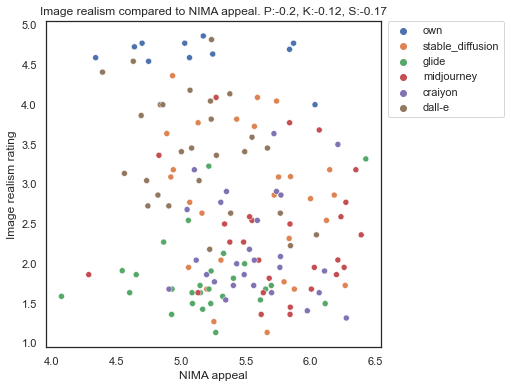

In [42]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

dm = pd.merge(df, drealism_mean, left_on="image_key", right_on="image_key")
dm["db"] = dm["image_key"].apply(lambda x: x.split("/")[0])
d(dm.head())

ax = sns.scatterplot(x="nima_appeal", y="rating", hue="db", data=dm)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_ylabel("Image realism rating")
ax.set_xlabel("NIMA appeal")

p =  dm[["nima_appeal", "rating"]].corr().values[0,1]
s = dm[["nima_appeal", "rating"]].corr(method="spearman").values[0,1]
k = dm[["nima_appeal", "rating"]].corr(method="kendall").values[0,1]

save_fig(ax, f"Image realism compared to NIMA appeal. P:{p.round(2)}, K:{k.round(2)}, S:{s.round(2)}", "realism_vs_nima.pdf")

In [43]:
values = []
for metric, dg in di.groupby(by="metric"):
    #print(metric)
    dm = pd.merge(dg, drealism_mean, left_on="image_key", right_on="image_key")
    #d(dm)
    
    p =  dm[["quality_score", "rating"]].corr().values[0,1]
    s = dm[["quality_score", "rating"]].corr(method="spearman").values[0,1]
    k = dm[["quality_score", "rating"]].corr(method="kendall").values[0,1]
    #print(p, s, k)
    values.append({
        "metric": metric,
        "p": p,
        "k": k,
        "s": s
    })

    #break
    
dmetrics = pd.DataFrame(values).sort_values(by="p")
d(dmetrics)
print(dmetrics.round(2).to_latex(index=False))




,metric,p,k,s
0,BRISQUE,-0.308367,-0.243729,-0.358192
2,ILNIQE,-0.245698,-0.157573,-0.229441
5,NIMA_appeal,-0.204365,-0.116111,-0.174417
7,NIQE,-0.168612,-0.103369,-0.161950
1,DBCNN,-0.056617,-0.013979,-0.018733
4,MUSIQ,0.023217,0.054680,0.084561
6,NIMA_quality,0.025721,0.005230,0.009176
3,MANIQA,0.227248,0.158524,0.236507


\begin{tabular}{lrrr}
\toprule
      metric &     p &     k &     s \\
\midrule
     BRISQUE & -0.31 & -0.24 & -0.36 \\
      ILNIQE & -0.25 & -0.16 & -0.23 \\
 NIMA\_appeal & -0.20 & -0.12 & -0.17 \\
        NIQE & -0.17 & -0.10 & -0.16 \\
       DBCNN & -0.06 & -0.01 & -0.02 \\
       MUSIQ &  0.02 &  0.05 &  0.08 \\
NIMA\_quality &  0.03 &  0.01 &  0.01 \\
      MANIQA &  0.23 &  0.16 &  0.24 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1943588/193537110.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dmetrics.round(2).to_latex(index=False))


In [44]:
di_wide = pd.pivot(
    di, 
    index=['image_key'], 
    columns = 'metric',
    values = 'quality_score'
)

#d(di_wide.reset_index())
dfeat = pd.merge(di_wide, drealism_mean, left_on="image_key", right_on="image_key")

d(dfeat)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

X = dfeat[dfeat.columns.difference(["image_key", "rating"])].values
Y = dfeat["rating"].values

model = RandomForestRegressor(n_jobs=-1, criterion="squared_error", random_state=42)

pred = cross_val_predict(model, X, Y, cv=10)

print(pred)

,image_key,BRISQUE,DBCNN,ILNIQE,MANIQA,MUSIQ,NIMA_appeal,NIMA_quality,NIQE,rating
0,craiyon/p01,25.367859,51.057320,33.671886,0.466089,51.691582,5.564671,5.507299,3.972400,2.045455
1,craiyon/p02,8.810669,55.195045,23.089588,0.469411,68.810799,5.305506,5.397500,3.208504,2.772727
2,craiyon/p03,24.447266,57.967525,22.402807,0.594650,77.050194,6.107202,4.639454,2.685209,1.909091
3,craiyon/p04,44.500427,33.711052,42.294760,0.360085,38.880398,5.101118,5.312219,7.274323,3.181818
4,craiyon/p05,29.026245,56.431339,23.623487,0.528562,64.424591,5.486148,5.102327,3.514461,1.863636
...,...,...,...,...,...,...,...,...,...,...
141,stable_diffusion/p23,10.125061,69.777054,20.873362,0.599800,74.770065,5.565258,5.143059,3.135735,3.727273
142,stable_diffusion/p24,5.935364,54.691650,28.178576,0.660778,60.904453,5.130220,5.370999,3.960104,3.772727
143,stable_diffusion/p25,14.124878,58.166477,20.604286,0.684895,70.483986,5.844317,5.007315,2.666893,3.095238
144,stable_diffusion/p26,49.064209,76.710747,21.403188,0.682027,74.843925,5.065353,5.810271,3.733732,2.772727


[2.26687935 3.04545455 2.30241107 2.0787747  2.0471645  2.58454545
 2.46474026 1.84857708 2.1187747  2.0991342  2.00019481 2.39142857
 2.02005929 2.61699511 3.0338961  2.3317269  1.99824111 2.56065217
 2.81045455 2.83720967 2.33902597 2.90954545 2.72827216 2.61136364
 2.71565217 2.43243271 2.28409091 2.63396951 3.51681818 2.74954545
 3.22922643 2.94337662 3.38640693 2.82328628 2.95458874 2.98695652
 2.99681818 3.10636364 2.51181818 2.96733766 3.36305195 2.57686147
 2.97775739 3.87045455 2.09912479 3.98533315 2.79466403 2.79249765
 3.35001976 2.70964427 3.71454545 3.7837747  3.79863636 3.72772727
 2.29793055 2.06580839 2.08300395 2.19889328 2.19270092 3.02322134
 3.47300395 2.41314982 2.59397233 2.11175889 2.42590909 2.37182195
 1.92227273 3.34936759 2.28158103 3.57909091 2.23138528 2.40773104
 2.50681818 2.3616996  2.70891304 2.48128458 2.34648221 2.74450028
 2.39743083 2.4629616  1.96549407 2.7512987  2.87454545 2.38681818
 2.76517316 2.31352814 3.33755317 2.52176172 2.39164502 2.0195

0.29 0.2 0.28


,image_key,rating,pred
0,craiyon/p01,2.045455,2.266879
1,craiyon/p02,2.772727,3.045455
2,craiyon/p03,1.909091,2.302411
3,craiyon/p04,3.181818,2.078775
4,craiyon/p05,1.863636,2.047165
...,...,...,...
141,stable_diffusion/p23,3.727273,2.291558
142,stable_diffusion/p24,3.772727,3.475649
143,stable_diffusion/p25,3.095238,2.425455
144,stable_diffusion/p26,2.772727,2.907727


<AxesSubplot:xlabel='rating', ylabel='pred'>

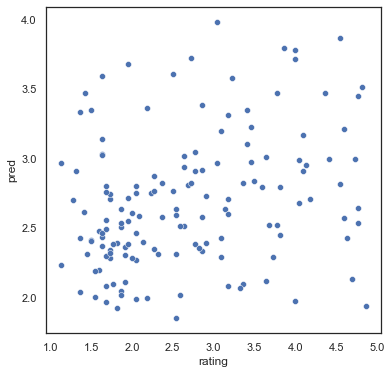

In [45]:
dval = dfeat[["image_key", "rating"]].copy()
dval["pred"] = pred

p =  dval[["pred", "rating"]].corr().values[0,1]
s = dval[["pred", "rating"]].corr(method="spearman").values[0,1]
k = dval[["pred", "rating"]].corr(method="kendall").values[0,1]

print(p.round(2), k.round(2), s.round(2))
d(dval)
sns.scatterplot(data=dval, x="rating", y="pred")

,image_key,rating,std
0,craiyon/p01,2.636364,1.292670
1,craiyon/p02,2.818182,1.139606
2,craiyon/p03,2.636364,1.216766
3,craiyon/p04,3.000000,1.309307
4,craiyon/p05,2.227273,1.020356
...,...,...,...
141,stable_diffusion/p23,3.272727,1.351606
142,stable_diffusion/p24,3.681818,1.041353
143,stable_diffusion/p25,2.714286,1.346954
144,stable_diffusion/p26,3.318182,1.249242


,image_key,rating
0,craiyon/p01,2.045455
1,craiyon/p02,2.772727
2,craiyon/p03,1.909091
3,craiyon/p04,3.181818
4,craiyon/p05,1.863636
...,...,...
141,stable_diffusion/p23,3.727273
142,stable_diffusion/p24,3.772727
143,stable_diffusion/p25,3.095238
144,stable_diffusion/p26,2.772727


,image_key,rating_appeal,std,rating_realism,db
0,craiyon/p01,2.636364,1.292670,2.045455,craiyon
1,craiyon/p02,2.818182,1.139606,2.772727,craiyon
2,craiyon/p03,2.636364,1.216766,1.909091,craiyon
3,craiyon/p04,3.000000,1.309307,3.181818,craiyon
4,craiyon/p05,2.227273,1.020356,1.863636,craiyon
...,...,...,...,...,...
141,stable_diffusion/p23,3.272727,1.351606,3.727273,stable_diffusion
142,stable_diffusion/p24,3.681818,1.041353,3.772727,stable_diffusion
143,stable_diffusion/p25,2.714286,1.346954,3.095238,stable_diffusion
144,stable_diffusion/p26,3.318182,1.249242,2.772727,stable_diffusion


<AxesSubplot:xlabel='rating_appeal', ylabel='rating_realism'>

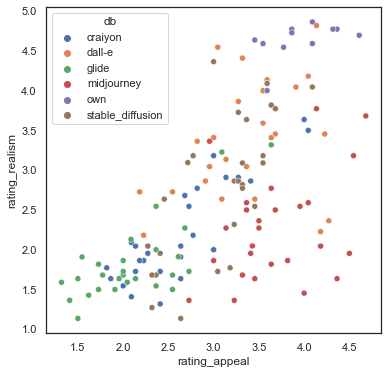

In [46]:
# compare appeal and realism

d(dappeal_mean)
d(drealism_mean)
darm = pd.merge(
    dappeal_mean, 
    drealism_mean, 
    left_on="image_key", 
    right_on="image_key",
    suffixes=("_appeal", "_realism")
)
darm["db"] = darm["image_key"].apply(
    lambda x:
        x.split("/")[0]
)

d(darm)
sns.scatterplot(data=darm, x="rating_appeal", y="rating_realism", hue="db")

In [47]:
import itertools
        
dar_values = []   # appeal realism correlations
pairs = list(itertools.combinations(db_order, 2))

def pvalue_text(p):
    if p <= 1.00e-04:
        return "****"
    if p <= 1.00e-03:
        return "***"
    if p <= 1.00e-02:
        return "**"
    if p <= 5.00e-02:
        return "*"
    return "ns"
        
        
for (x,y) in pairs:
    dd = darm[darm["db"] == x]
    dy = darm[darm["db"] == y]
    
    dar_values.append({
        "db": x,
        "vs": y,
        "realism sig diff (kruskal,0.05)": pvalue_text(stats.kruskal(dd["rating_realism"].values,dy["rating_realism"].values).pvalue),
        "appeal sig diff (kruskal,0.05)": pvalue_text(stats.kruskal(dd["rating_appeal"].values,dy["rating_appeal"].values).pvalue),
        }
    )


ddar = pd.DataFrame(dar_values)
d(ddar)
print(ddar.to_latex(index=False))


,db,vs,"realism sig diff (kruskal,0.05)","appeal sig diff (kruskal,0.05)"
0,craiyon,dall-e,****,****
1,craiyon,glide,*,**
2,craiyon,midjourney,ns,****
3,craiyon,own,****,****
4,craiyon,stable_diffusion,*,**
5,dall-e,glide,****,****
6,dall-e,midjourney,****,ns
7,dall-e,own,****,**
8,dall-e,stable_diffusion,*,ns
9,glide,midjourney,**,****


\begin{tabular}{llll}
\toprule
        db &               vs & realism sig diff (kruskal,0.05) & appeal sig diff (kruskal,0.05) \\
\midrule
   craiyon &           dall-e &                            **** &                           **** \\
   craiyon &            glide &                               * &                             ** \\
   craiyon &       midjourney &                              ns &                           **** \\
   craiyon &              own &                            **** &                           **** \\
   craiyon & stable\_diffusion &                               * &                             ** \\
    dall-e &            glide &                            **** &                           **** \\
    dall-e &       midjourney &                            **** &                             ns \\
    dall-e &              own &                            **** &                             ** \\
    dall-e & stable\_diffusion &                           

/tmp/ipykernel_1943588/3962295091.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ddar.to_latex(index=False))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

,db,p,k,s,mean_appeal,mean_realism
0,craiyon,0.865668,0.615390,0.797951,2.607744,2.200337
1,dall-e,0.331853,0.265897,0.323651,3.380471,3.410774
2,glide,0.745759,0.460413,0.604872,2.117716,1.835665
3,midjourney,0.292924,0.205206,0.272547,3.672439,2.340148
4,own,0.485223,0.365452,0.561214,3.960295,4.633489
5,stable_diffusion,0.693648,0.532567,0.694343,3.087061,2.784672


/tmp/ipykernel_1943588/534904648.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dar.sort_values(by="p").round(2).to_latex(index=False))


\begin{tabular}{lrrrrr}
\toprule
              db &    p &    k &    s &  mean\_appeal &  mean\_realism \\
\midrule
      midjourney & 0.29 & 0.21 & 0.27 &         3.67 &          2.34 \\
          dall-e & 0.33 & 0.27 & 0.32 &         3.38 &          3.41 \\
             own & 0.49 & 0.37 & 0.56 &         3.96 &          4.63 \\
stable\_diffusion & 0.69 & 0.53 & 0.69 &         3.09 &          2.78 \\
           glide & 0.75 & 0.46 & 0.60 &         2.12 &          1.84 \\
         craiyon & 0.87 & 0.62 & 0.80 &         2.61 &          2.20 \\
\bottomrule
\end{tabular}



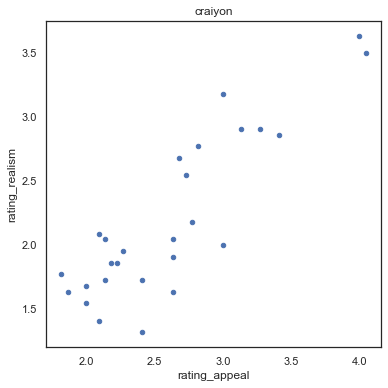

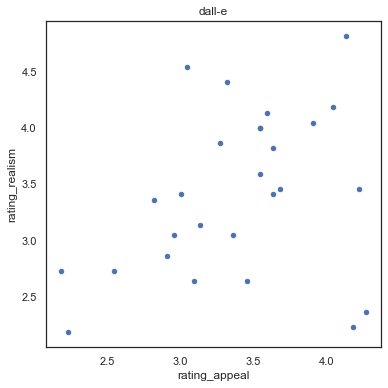

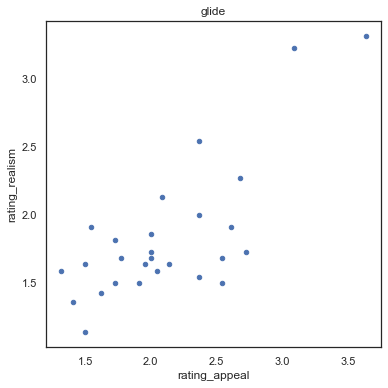

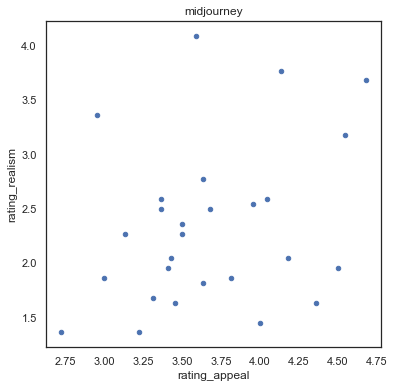

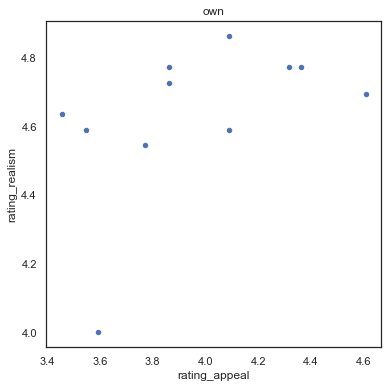

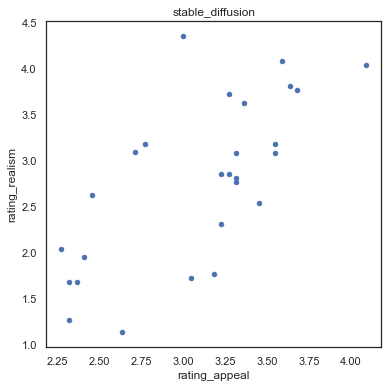

In [48]:
ar_values = []   # appeal realism correlations

for x, dd in darm.groupby(by="db"):
    ax = dd.plot(x="rating_appeal", y="rating_realism", kind="scatter")
    ax.set_title(x)
    ar_values.append({
            "db": x,
            "p": dd[["rating_appeal", "rating_realism"]].corr().values[0,1],
            "k": dd[["rating_appeal", "rating_realism"]].corr(method="kendall").values[0,1],
            "s": dd[["rating_appeal", "rating_realism"]].corr(method="spearman").values[0,1],
            "mean_appeal": dd["rating_appeal"].mean(),
            "mean_realism": dd["rating_realism"].mean(),
        }
    )
dar = pd.DataFrame(ar_values)
d(dar)
print(dar.sort_values(by="p").round(2).to_latex(index=False))

In [49]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")

# text prompt matching
* brief evaluation how good the images matched the given text prompt on a "AI generator"-basis

In [50]:
d(dprompt)
dprompt_mean = dprompt.groupby(by="image_key").mean().reset_index()[["image_key", "rating"]]
d(dprompt_mean)

,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp,is_rating,valid_user,db,image_key
4,1,91,./stimuli/midjourney/p11.png,range_prompt_matching,1,2022-09-26 15:42:06 615170,True,True,midjourney,midjourney/p11
14,1,64,./stimuli/glide/p11.png,range_prompt_matching,1,2022-09-26 15:42:16 529229,True,True,glide,glide/p11
23,1,17,./stimuli/craiyon/p18.png,range_prompt_matching,1,2022-09-26 15:42:30 190700,True,True,craiyon,craiyon/p18
32,1,135,./stimuli/stable_diffusion/p17.png,range_prompt_matching,3,2022-09-26 15:42:46 618991,True,True,stable_diffusion,stable_diffusion/p17
41,1,47,./stimuli/dall-e/p21.png,range_prompt_matching,5,2022-09-26 15:43:11 953410,True,True,dall-e,dall-e/p21
...,...,...,...,...,...,...,...,...,...,...
30571,117,145,./stimuli/stable_diffusion/p27.png,range_prompt_matching,5,2022-12-01 23:03:25 166015,True,True,stable_diffusion,stable_diffusion/p27
30580,117,26,./stimuli/craiyon/p27.png,range_prompt_matching,1,2022-12-01 23:03:34 624373,True,True,craiyon,craiyon/p27
30589,117,58,./stimuli/glide/p05.png,range_prompt_matching,5,2022-12-01 23:03:46 034164,True,True,glide,glide/p05
30598,117,56,./stimuli/glide/p03.png,range_prompt_matching,1,2022-12-01 23:03:53 211456,True,True,glide,glide/p03


,image_key,rating
0,craiyon/p01,4.727273
1,craiyon/p02,4.818182
2,craiyon/p03,4.681818
3,craiyon/p04,3.181818
4,craiyon/p05,4.590909
...,...,...
141,stable_diffusion/p23,3.636364
142,stable_diffusion/p24,4.636364
143,stable_diffusion/p25,4.190476
144,stable_diffusion/p26,4.727273


In [51]:

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")

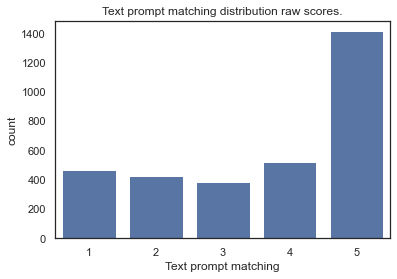

In [52]:
ax = sns.countplot(data=dprompt, x="rating",  color="b")
ax.set_xlabel("Text prompt matching")
save_fig(ax, "Text prompt matching distribution raw scores.", "rating_dist_prompt.pdf")

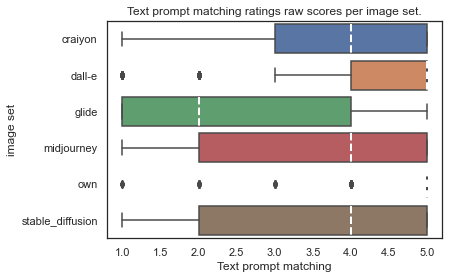

In [53]:
ax = sns.boxplot(data=dprompt, x="rating", y="db", medianprops={"color": "white", "lw":2, "linestyle":"--"}, order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Text prompt matching")

save_fig(ax, "Text prompt matching ratings raw scores per image set.", "rating_prompt_per_db.pdf")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

craiyon vs. dall-e: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.358e-24 Stat=1.030e+02
dall-e vs. glide: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.799e-59 Stat=2.625e+02
glide vs. midjourney: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.536e-73 Stat=3.269e+02
midjourney vs. own: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.133e-03 Stat=8.224e+00
own vs. stable_diffusion: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.753e-20 Stat=8.266e+01
craiyon vs. glide: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.689e-12 Stat=4.684e+01
dall-e vs. midjourney: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.104e-06 Stat=2.080e+01
glide vs. own: Krusk

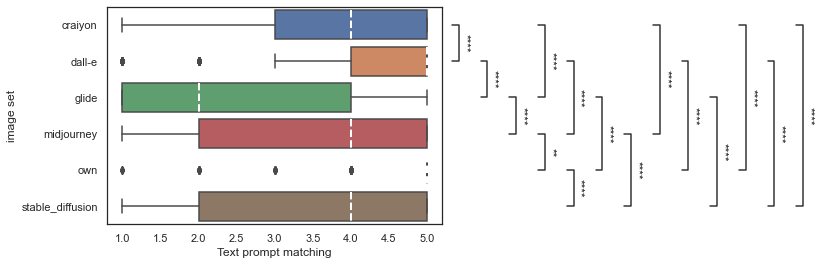

In [54]:
from statannotations.Annotator import Annotator
pairs = list(itertools.combinations(db_order, 2))

ax = sns.boxplot(data=dprompt, x="rating", y="db", medianprops={"color": "white", "lw":2, "linestyle":"--"},  order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Text prompt matching")


annot = Annotator(
    ax, 
    pairs, # [("craiyon", "dall-e")], 
    data=dappeal, 
    x="rating", 
    y="db",
    order=db_order,
    orient='h'
)
annot.configure(test='Kruskal', text_format='star', loc='outside', verbose=2)
# other possible tests: 
# ['t-test_ind', 't-test_welch', 't-test_paired',
#                    'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls',
#                     'Levene', 'Wilcoxon', 'Kruskal', 'Brunner-Munzel']
annot.apply_test()
ax, test_results = annot.annotate()

In [55]:
d(dprompt_mean.sort_values(by="rating").head(1))
d(dprompt_mean.sort_values(by="rating").tail(1))

dprompt_mean_with_prompt = dprompt_mean.copy()
dprompt_mean_with_prompt["prompt"] = dprompt_mean_with_prompt["image_key"].apply(lambda x: x.split("/")[1])
d(dprompt_mean_with_prompt)

,image_key,rating
63,glide/p10,1.090909


,image_key,rating
28,dall-e/p02,5.0


,image_key,rating,prompt
0,craiyon/p01,4.727273,p01
1,craiyon/p02,4.818182,p02
2,craiyon/p03,4.681818,p03
3,craiyon/p04,3.181818,p04
4,craiyon/p05,4.590909,p05
...,...,...,...
141,stable_diffusion/p23,3.636364,p23
142,stable_diffusion/p24,4.636364,p24
143,stable_diffusion/p25,4.190476,p25
144,stable_diffusion/p26,4.727273,p26


In [56]:
dp10 = dprompt_mean_with_prompt[dprompt_mean_with_prompt["prompt"] == "p10"].sort_values(by="rating")
print(list(dp10["image_key"].values))
print(list(dp10["rating"].round(2).values))

['glide/p10', 'craiyon/p10', 'midjourney/p10', 'stable_diffusion/p10', 'dall-e/p10']
[1.09, 2.18, 2.23, 3.05, 4.86]


In [57]:
dp02 = dprompt_mean_with_prompt[dprompt_mean_with_prompt["prompt"] == "p02"].sort_values(by="rating")
print(list(dp02["image_key"].values))
print(list(dp02["rating"].round(2).values))

['midjourney/p02', 'stable_diffusion/p02', 'craiyon/p02', 'glide/p02', 'dall-e/p02']
[4.32, 4.77, 4.82, 4.91, 5.0]
